In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import config
import os

ProcessedPath = config.SavePath
GROUPS = config.GROUPS

In [7]:
max_days = {}
for j in GROUPS:
    print(j+'\n')
    SavePath = ProcessedPath + str(j) + '/GPS_Days/'
    paths = os.listdir(SavePath)
    date,ind= [],[]
    for i in paths:
        data =  pd.read_csv(SavePath + '/'+ i ,index_col=0)
        date.append(i)
        ind.append(len(data['Individual'].unique()))
    max_item = max(ind)
    if max_item>=4:
        index_list = [date[index] for index in range(len(ind)) if ind[index] == max_item]
        max_days[j] = [index_list,max_item]
    

NQ_2021_1

ZU_2021_1

RW_2021_1

ZU_2021_2



In [10]:
print(max_days)


del max_days['ZU_2021_1'][0][0]

print(max_days)

{'NQ_2021_1': [['2021-08-11', '2021-08-12'], 5], 'ZU_2021_1': [['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22'], 6], 'ZU_2021_2': [['2021-07-21', '2021-07-22'], 4]}
{'NQ_2021_1': [['2021-08-11', '2021-08-12'], 5], 'ZU_2021_1': [['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22'], 6], 'ZU_2021_2': [['2021-07-21', '2021-07-22'], 4]}


['0:2021-05-19', '1:2021-05-20', '2:2021-05-21', '3:2021-05-22']
['VZUF051', 'VZUF052', 'VZUF054', 'VZUM053', 'VZUM057', 'VZUM059']
['VZUF051', 'VZUF052', 'VZUF054', 'VZUM053', 'VZUM057', 'VZUM059']
['VZUF051', 'VZUF052', 'VZUF054', 'VZUM053', 'VZUM057', 'VZUM059']
['VZUF051', 'VZUF052', 'VZUF054', 'VZUM053', 'VZUM057', 'VZUM059']


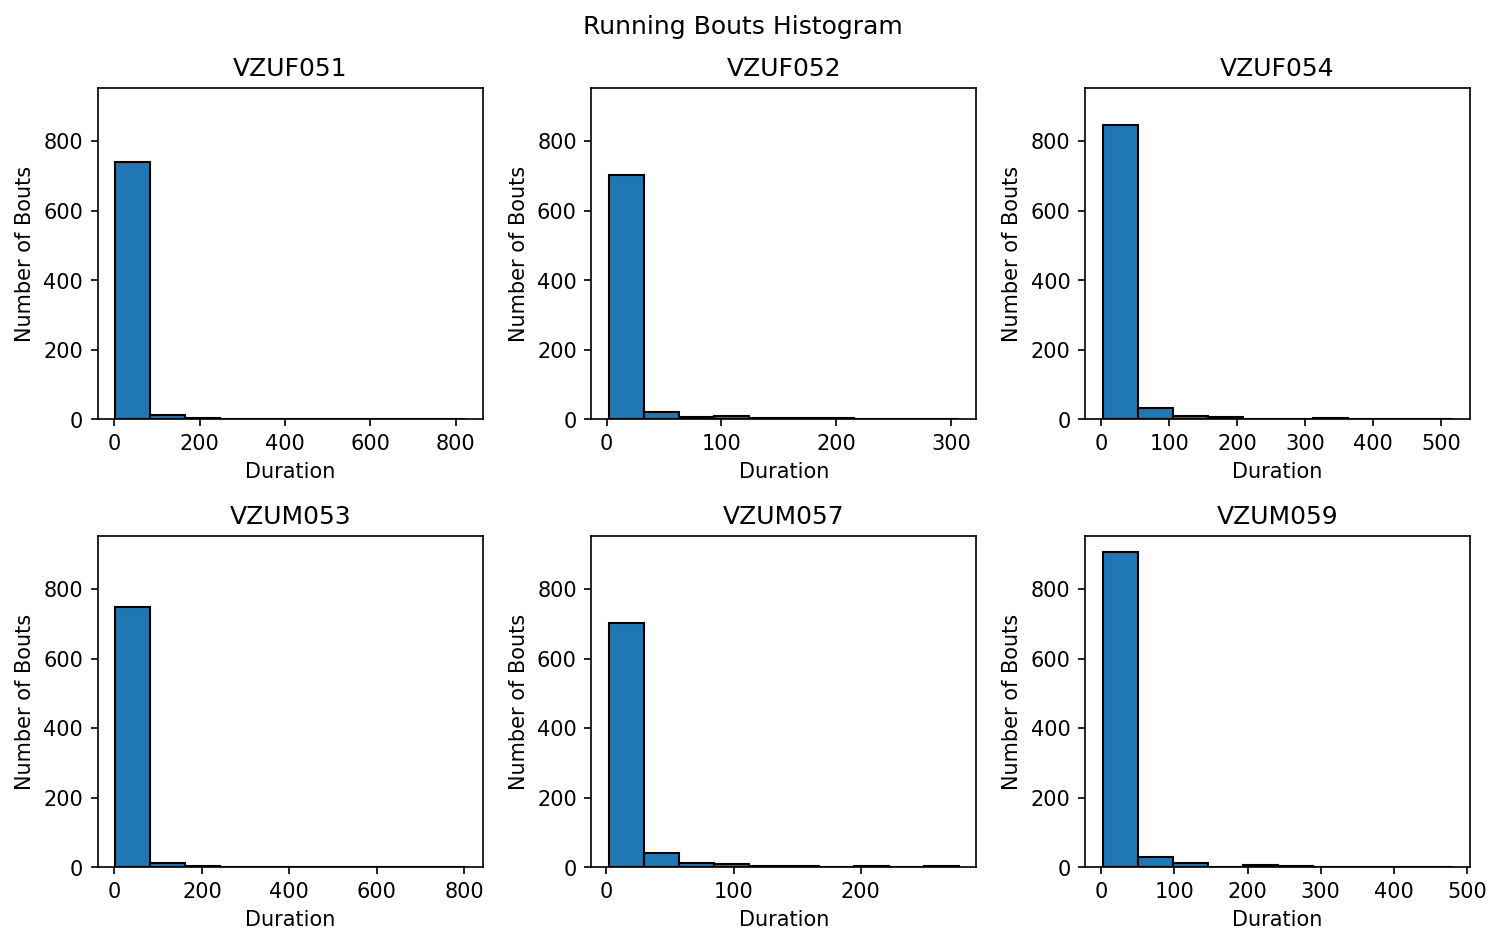

In [12]:
k = 'ZU_2021_1'

print([str(i) + ':' + str(max_days[k][0][i]) for i in range(len(max_days[k][0]))])



bouts = {}
for j in max_days[k][0]:
    data = pd.read_csv(ProcessedPath + str(k) + '/GPS_Days/'+ j,index_col=0)
    meerkats = sorted(data['Individual'].unique())
    print(meerkats)
    df =  data.groupby('Timestamp')
    
    dfnew = df.filter(lambda x: len(x['Individual'].unique())>=2)
    dfnew = dfnew.reset_index(drop=True)
    
    
    for key,value in dfnew.groupby('Individual'):
        df_ = value.loc[value['Behavior']!='Vigilance']
        diffs = np.diff(df_.index)
        for q in diffs:
            bouts.setdefault(key,[]).append(q)
fig,ax = plt.subplots(nrows=3,ncols=3, figsize=(10, 9),dpi=150,sharey=True)#,sharex=True)
ax = ax.flatten()
i=0 
bouts_dict = {}
for m in meerkats:
        fig.suptitle('Running Bouts Histogram')
        ax[i].set_title(m)
        ax[i].set_xlabel('Duration')
        ax[i].set_ylabel('Number of Bouts')
        ax[i].xaxis.set_tick_params(labelbottom=True)
        ax[i].yaxis.set_tick_params(labelbottom=True)
        b = np.array(bouts[m])
        bouts_dict[m] = b
        ax[i].hist(b[b>1],edgecolor="k")
        i = i + 1
for a in ax[len(max_days[k][0])+2:]:
    a.remove()
plt.tight_layout()
plt.show()

In [13]:
data = bouts_dict['VZUM059']
fit = powerlaw.Fit(data, discrete = True)

Calculating best minimal value for power law fit


Calculating best minimal value for power law fit


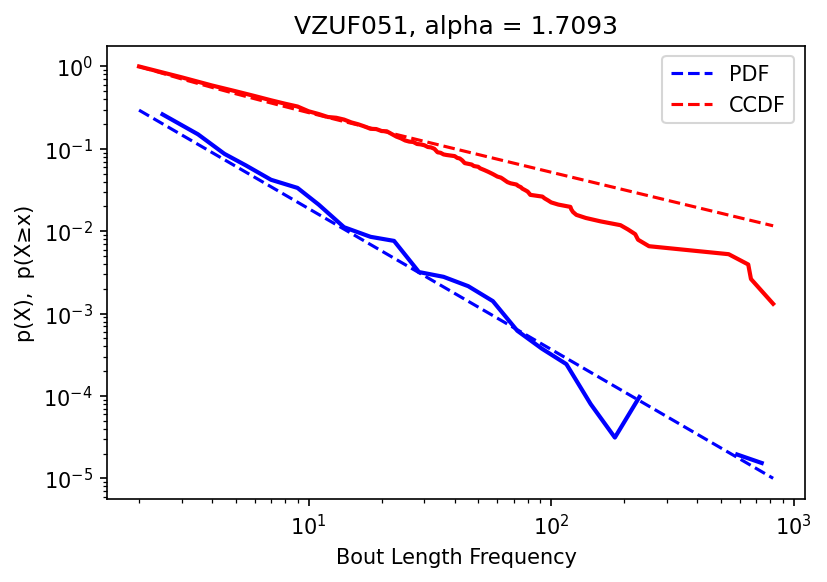

Calculating best minimal value for power law fit


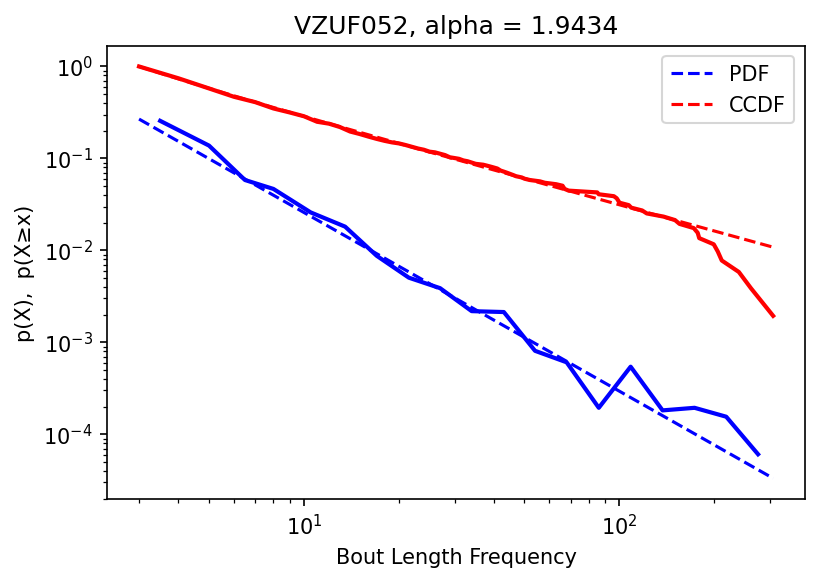

Calculating best minimal value for power law fit


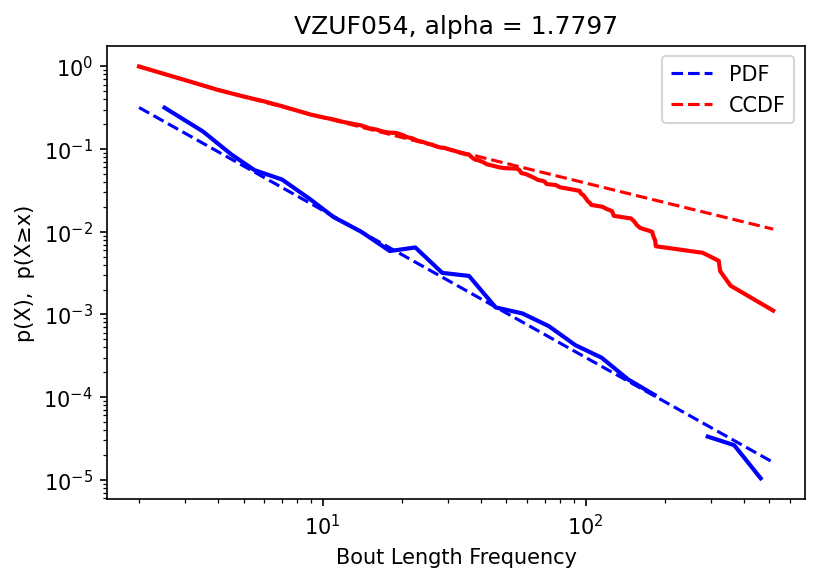

Calculating best minimal value for power law fit


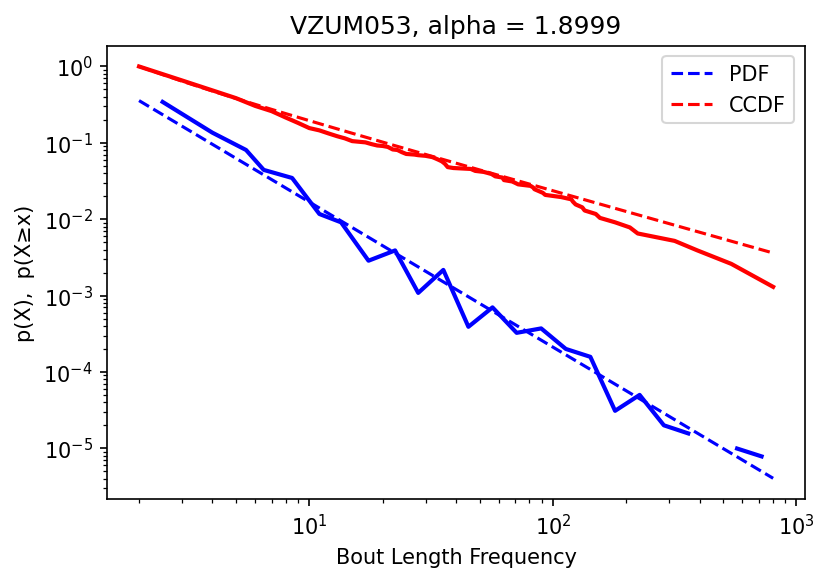

Calculating best minimal value for power law fit


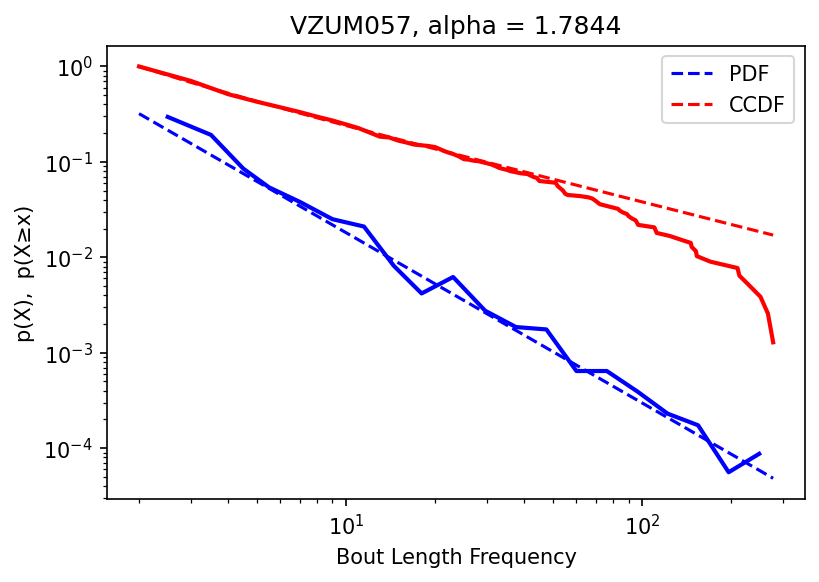

Calculating best minimal value for power law fit


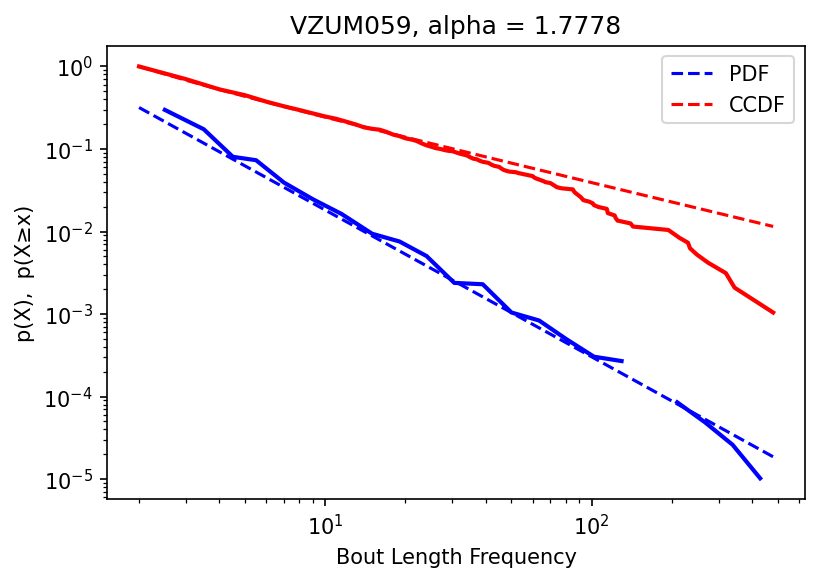

In [44]:
####
for i in bouts_dict.keys():
    data = bouts_dict[i]
    fit = powerlaw.Fit(data, discrete = True)
    plt.figure(dpi=150)
    
    figCCDF = fit.plot_pdf(color='b', linewidth=2)
    
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF,label='PDF')
    fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF,label='CCDF')
    ####
    figCCDF.set_title('{}, alpha = {}'.format(i,np.round(fit.power_law.alpha,4)) )
    figCCDF.set_ylabel(u"p(X),  p(X≥x)")
    figCCDF.set_xlabel(r"Bout Length Frequency")
    plt.legend()
    plt.show()
    plt.close()
#savefig(figname+'.eps', bbox_inches='tight')

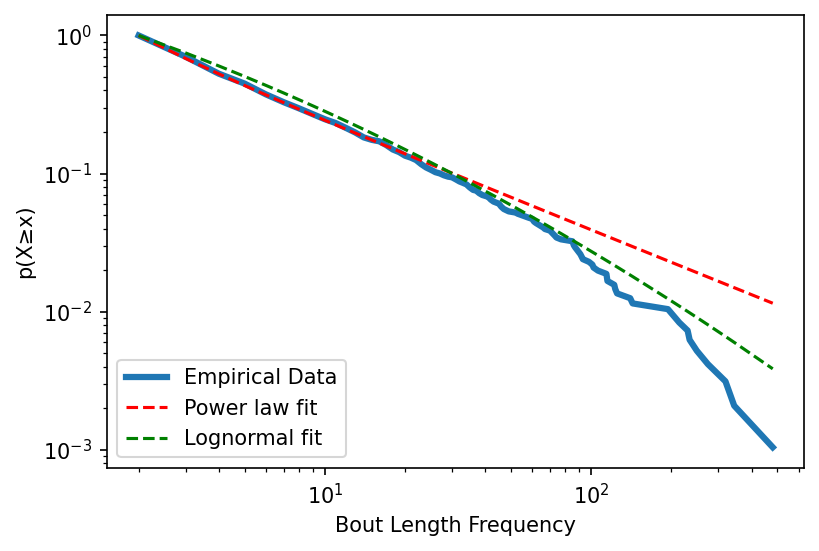

In [24]:
plt.figure(dpi=150)
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel(u"Bout Length Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'


In [26]:
fit.distribution_compare('power_law', 'lognormal')

(-8.839975599396576, 0.0016931140442144183)